In [3]:
#imports the necessary libraries
import pandas
import numpy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
first_baseball_query = """
SELECT
  pitchType,
  pitchTypeDescription,
  pitchSpeed,
  pitcherPitchCount,
  hitType
FROM (
  SELECT
    pitchType,
    pitchTypeDescription,
    pitchSpeed,
    pitcherPitchCount,
    hitterPitchCount,
    venueOutfieldDistances,
    hitType
  FROM
    [bigquery-public-data:baseball.games_post_wide]
  WHERE
    atBatEventType = 'PITCH'
    AND hitType != '')
WHERE
  hitType='LD'
"""

In [4]:
## Now that our query is saved we will run it the pandas gbq.read module. We also need to add our project ID.
line_drive_dataPost = pandas.io.gbq.read_gbq(first_baseball_query,project_id="bigquerytest-1470224165876",verbose=True)

Requesting query... ok.
Query running...
Query done.
Processed: 322.0 kb

Retrieving results...
Got 343 rows.

Total time taken 1.87 s.
Finished at 2016-12-04 15:09:32.


In [6]:
#Here we will run the function head() to determine how the first 5 rows of data looks 
line_drive_dataPost.head()

,pitchType,pitchTypeDescription,pitchSpeed,pitcherPitchCount,hitType
0,FA,Fastball,94,10,LD
1,CH,Changeup,89,15,LD
2,FA,Fastball,98,10,LD
3,FA,Fastball,97,28,LD
4,FA,Fastball,98,22,LD


In [7]:
#Here with Pandas we are picking a certain column in the table and getting the total count for that column
line_drive_dataPost["pitchType"].value_counts()

FA    163
SL     61
CU     41
SI     29
CH     24
CT     24
SP      1
Name: pitchType, dtype: int64

In [8]:
#We will save this in a variable called pitch type
pitch_type=line_drive_dataPost["pitchType"].value_counts()

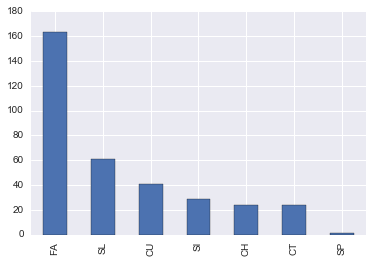

In [19]:
#We run that variable on the .plot function to produce our barchart
pitch_type.plot(kind="bar")

In [26]:
## Baseball query with pitchZone, pitchSpeed and Count of pitch speed 
chapman_strikeZone_data ="""
SELECT
  pitchZone,
  ROUND(AVG(pitchSpeed),2) AS avg_pitchSpeed,
  COUNT(pitchSpeed) AS count
FROM (
  SELECT
    pitchZone,
    pitchSpeed,
    pitchType
  FROM (
    SELECT
      *
    FROM (
      SELECT
        pitcherLastName,
        pitcherFirstName,
        pitchSpeed,
        pitchZone,
        pitcherPitchCount,
        hitType,
        balls,
        strikes,
        pitchType
      FROM
        [bigquery-public-data:baseball.games_wide] )
    WHERE
      pitcherLastName ="Chapman"
    GROUP BY
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      9)
  GROUP BY
    1,
    2,
    3)
WHERE pitchZone > 0
GROUP BY
  1
ORDER BY
  pitchZone ASC
"""

In [27]:
#Again we save our data to a variable
chapman_pitch_data = pandas.io.gbq.read_gbq(chapman_strikeZone_data,project_id="bigquerytest-1470224165876",verbose=True)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 13 rows.

Total time taken 1.69 s.
Finished at 2016-12-04 15:59:17.


In [28]:
#We do a quick count of our data using the head() function and insert the parameter 15 to get 15 rows instead of 5
chapman_pitch_data.head(15)

,pitchZone,avg_pitchSpeed,count
0,1,91.95,21
1,2,93.88,16
2,3,93.71,14
3,4,89.89,27
4,5,90.04,23
5,6,91.40,25
6,7,92.88,17
7,8,90.73,22
8,9,91.17,23
9,10,86.95,21


In [29]:
chapman_pivot_data = chapman_pitch_data.pivot("pitchZone","count","avg_pitchSpeed")

In [30]:
#We take a look at our data to make sure everything is okay.
#We will get some NA numbers because we are getting the avg pitchSpeed for that zone. 
chapman_pivot_data

count,14,16,17,21,22,23,25,27,32,33
pitchZone,,,,,,,,,,
1,NaN,NaN,NaN,91.95,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,93.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.89,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,90.04,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,91.4,NaN,NaN,NaN
7,NaN,NaN,92.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,90.73,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,91.17,NaN,NaN,NaN,NaN


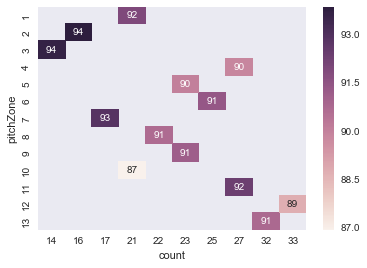

In [40]:
heatmap = sns.heatmap(chapman_pivot_data,annot=True)